# #2 Exploratory_Data_Analysis (EDA)

## In this Notebook , I did:
- Perform Univariate , Bivariate , Multivariate Analysis
- Exploring Sales trends w.r.t (time_based,category_based,location_based)
- Studying Customer Demographics
- Checking Correlation between numerical values of dataset

##### Goal :- The goal of EDA is to **Understand the data insides deeply** before moving to modelling or business insights

In [27]:
# 1 Importing Libraries and loading dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load clean dataset
df=pd.read_csv(r"C:\Users\ASUS\Desktop\FINAL PROJECT FOR PLACEMENT\Retail_EDA_project\data\retail_sales_cleaned.csv")

# Ensuring order_date column should be in datetime datatype
df['order_date']=pd.to_datetime(df['order_date'])

df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age,total_sales,year,month,day,day_name
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56,746.72,2024,12,17,Tuesday
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,4.0,M,59,1496.70,2024,6,1,Saturday
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64,115.00,2025,2,4,Tuesday
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34,460.22,2024,10,28,Monday
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33,706.88,2024,5,10,Friday


## Step 1: Univariate Analysis
#### Univariate analysis means exploring **one column at a time**.
- **For Numerical columns** :- I check distribution ,outliers,spread.
- **For Categorical columns** :- I check frequency for each category.

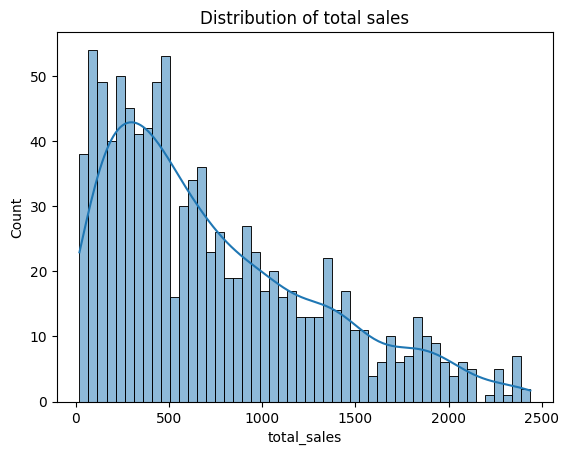

In [3]:
# Distribution of total sales (numerical columns)
sns.histplot(df['total_sales'],bins=50,kde=True)
plt.title("Distribution of total sales")
plt.show()

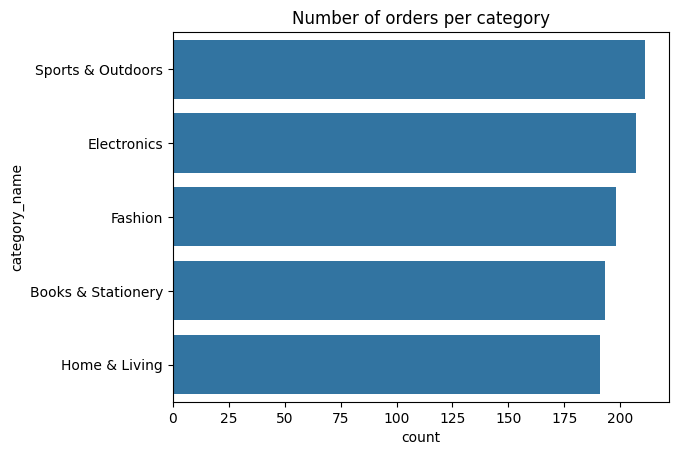

Index(['Sports & Outdoors', 'Electronics', 'Fashion', 'Books & Stationery',
       'Home & Living'],
      dtype='object', name='category_name')

In [4]:
# Category wise count(Categorical column)

sns.countplot(df['category_name'],order=df['category_name'].value_counts().index)
plt.title("Number of orders per category")
plt.show()
df['category_name'].value_counts().index

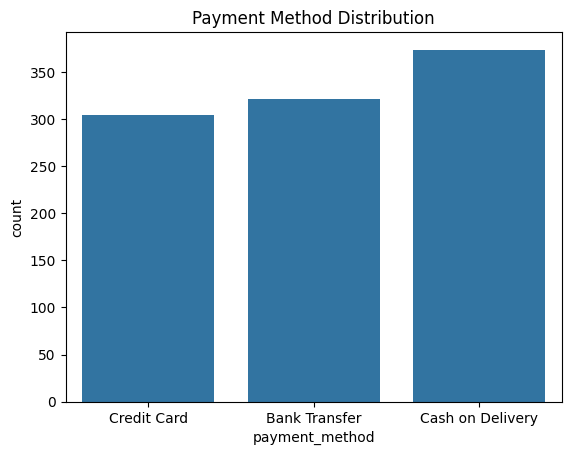

In [5]:
#  Payment method distribution
sns.countplot(data=df,x='payment_method')
plt.title("Payment Method Distribution")
plt.show()

## Step 2: Bivariate Analysis
#### Bivariate analysis means exploring **two column at a time**.
- It helps us to see how one variable affects another (example :- category vs total_sales)


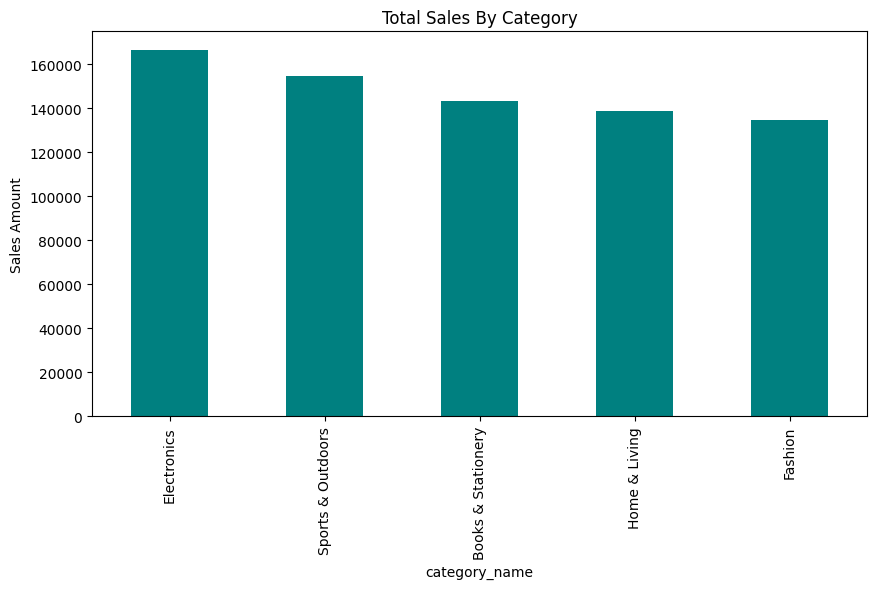

In [6]:
#  Category Vs Total Sales

category_sales=df.groupby('category_name')['total_sales'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar',figsize=(10,5),color='teal')
plt.title('Total Sales By Category')
plt.ylabel('Sales Amount')
plt.show()

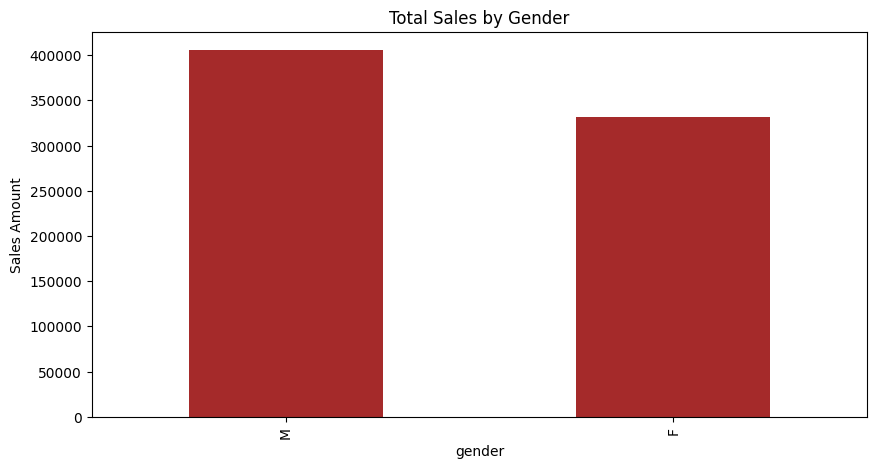

In [7]:
# Gender Vs Total Sales

gender_sales=df.groupby('gender')['total_sales'].sum().sort_values(ascending=False)

gender_sales.plot(kind='bar',figsize=(10,5),color='brown')
plt.title("Total Sales by Gender")
plt.ylabel("Sales Amount")
plt.show()

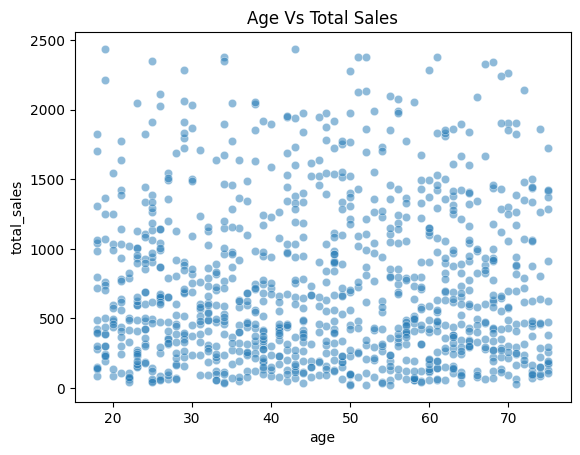

In [8]:
# Age Vs Total_Sales

# here i use scatterplot because age vary row by row category by category , so it is very non clustured thats why i use this 

sns.scatterplot(x='age',y='total_sales',data=df , alpha=0.5)
plt.title("Age Vs Total Sales")
plt.show()

## Step 3: Time Based Analysis
#### Time is very important factor in retail sales.
**Here i check monthly and Weekly trends in dataset**

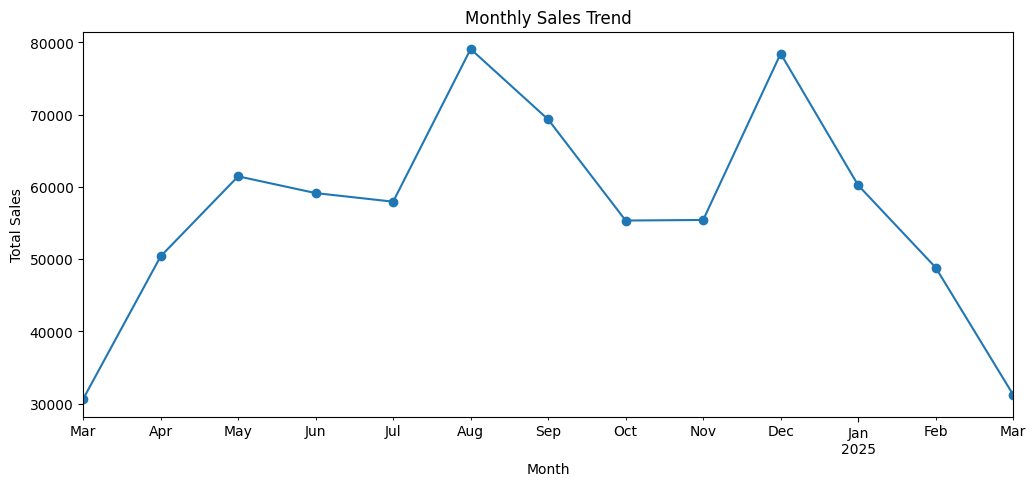

In [9]:
# Monthly Sales Trends
import datetime as dt
monthly_sales=df.groupby(df['order_date'].dt.to_period('M'))['total_sales'].sum()

monthly_sales.plot(kind='line',figsize=(12,5),marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()

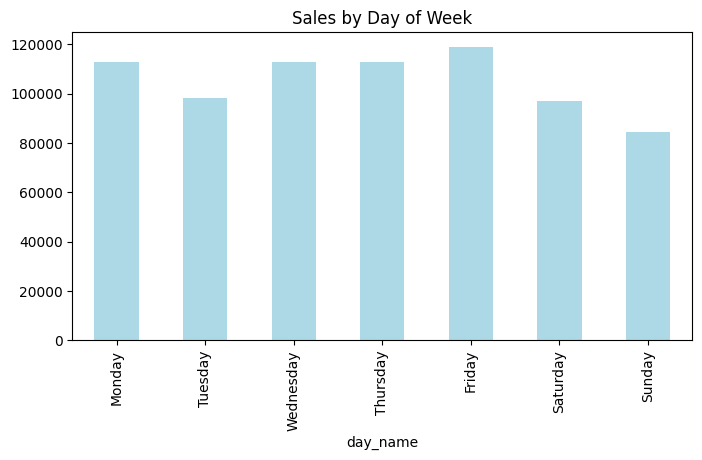

In [10]:
#  WeekDay Sales Trends
weekday_sales=df.groupby('day_name')['total_sales'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
 )

weekday_sales.plot(kind='bar',color='lightblue',figsize=(8,4))
plt.title("Sales by Day of Week")
plt.show()

## Step 4: City - Level Insights
#### Here I check which city contribute the most in sales

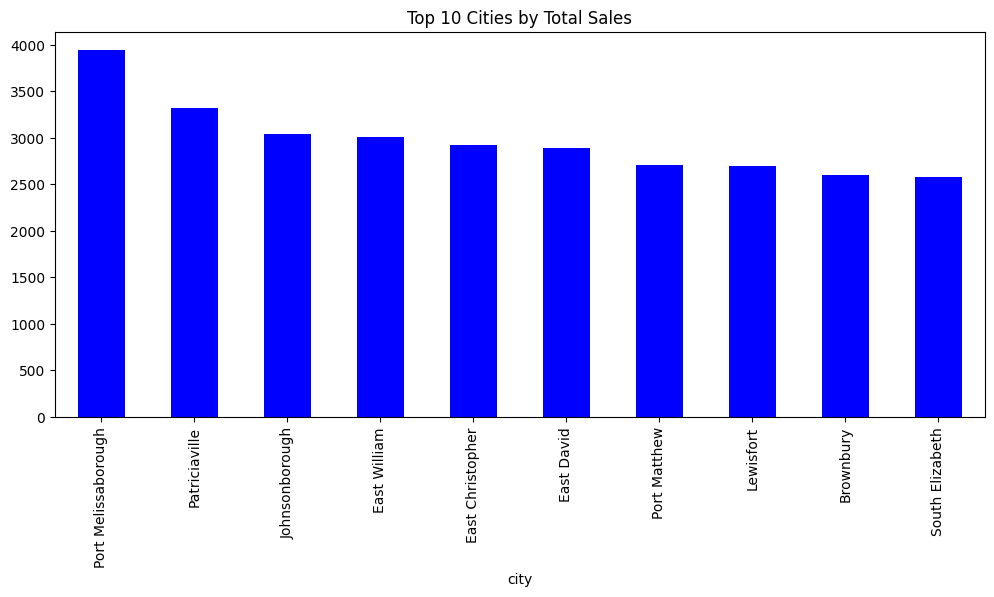

In [16]:
# Top 10 cities by sales
top_cities=df.groupby('city')['total_sales'].sum().sort_values(ascending=False).head(10)

top_cities.plot(kind='bar',figsize=(12,5),color='blue')
plt.title("Top 10 Cities by Total Sales")
plt.show()

## Step 5: Customer Behavior
#### We will explore gender,age and reviews to understand customers better.

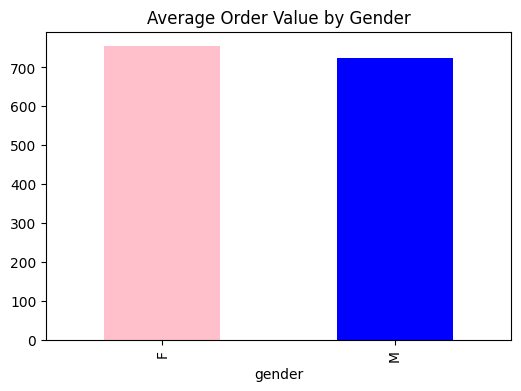

In [18]:
# Average order value by gender
avg_gender = df.groupby('gender')['total_sales'].mean()

avg_gender.plot(kind='bar',color=['pink','blue'],figsize=(6,4))
plt.title('Average Order Value by Gender')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17104\2438466493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="review_score",data=df,palette='coolwarm')


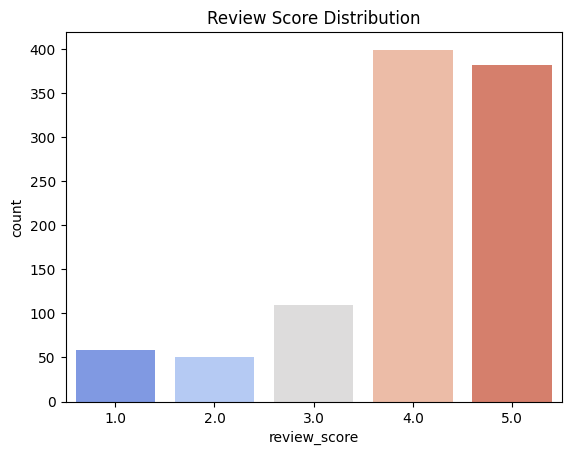

In [ ]:
#  Review Score Distribution
sns.countplot(x="review_score",data=df,palette='coolwarm',)
plt.title("Review Score Distribution")
plt.show()

## Step 6: Correlation Analysis
#### - Correlation shows relationships between numerical variables.
#### - If two features are highly correlated, they gave similar information

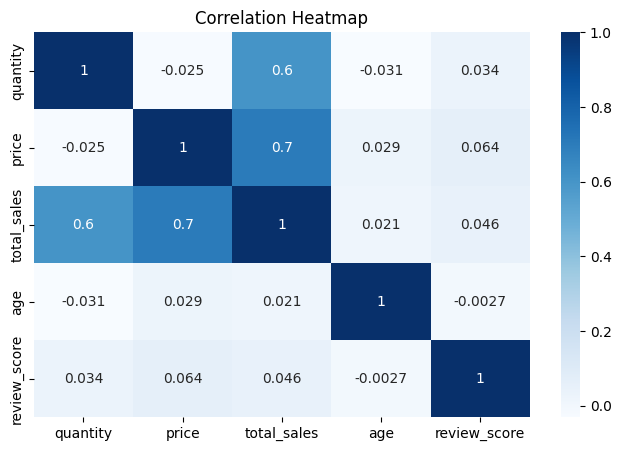

In [26]:
# Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df[['quantity','price','total_sales','age','review_score']].corr(), annot=True , cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

## Key Insights (From Analysis)
1. Electronics and Fashion are top-selling category.
2. Credit Card is the most used Payment Method.
3. Sales Peak in December (holiday season).
4. Customer aged (25-40) spend the most.
5. Female Customers spend slightly more than male Customers.
6. Most sales come from a small number of cities. This follows the 80/20 rule — focusing on these top cities can help grow the business faster.
7. Most Review Score are Positive (4 or 5).